In [1]:
from quantecon import game_theory as gt
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Abreu and Sannikov (2014) Example

In [3]:
p1 = gt.Player([[16, 3, 0], [21, 10, -1], [9, 5, -5]])
p2 = gt.Player([[9, 1, 0], [13, 4, -4], [3, 0, -15]])
g = gt.NormalFormGame([p1, p2])

In [4]:
hull = gt.AS(g, 0.3)
hull0 = ConvexHull(g.payoff_profile_array.reshape(np.prod(g.nums_actions), 2))

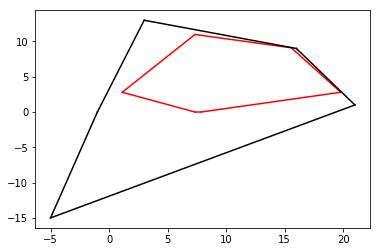

In [5]:
for simplex in hull.simplices:
    plt.plot(hull.points[simplex, 0], hull.points[simplex, 1], 'r-')
    
for simplex in hull0.simplices:
    plt.plot(hull0.points[simplex, 0], hull0.points[simplex, 1], 'k-')

In [6]:
%timeit gt.AS(g, 0.3)
%timeit gt.AS(g, 0.3)
%timeit gt.AS(g, 0.3)

10 loops, best of 3: 29.5 ms per loop
10 loops, best of 3: 32.6 ms per loop
10 loops, best of 3: 29.6 ms per loop


# Prisoner's Dilemma

In [7]:
pd_payoff = [[9.0, 1.0],
             [10.0, 3.0]]
A = gt.Player(pd_payoff)
B = gt.Player(pd_payoff)
pd = gt.NormalFormGame((A, B))

In [8]:
hull = gt.AS(pd, 0.9, u=np.array([3, 3]))
hull0 = ConvexHull(pd.payoff_profile_array.reshape(np.prod(pd.nums_actions), 2))

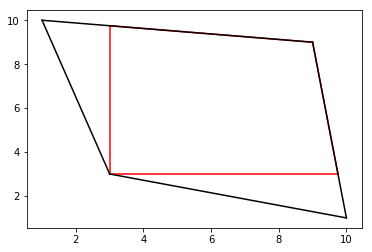

In [9]:
for simplex in hull.simplices:
    plt.plot(hull.points[simplex, 0], hull.points[simplex, 1], 'r-')
    
for simplex in hull0.simplices:
    plt.plot(hull0.points[simplex, 0], hull0.points[simplex, 1], 'k-')

In [10]:
%timeit gt.AS(pd, 0.9, u=np.array([3, 3]))
%timeit gt.AS(pd, 0.9, u=np.array([3, 3]))
%timeit gt.AS(pd, 0.9, u=np.array([3, 3]))

100 loops, best of 3: 3.67 ms per loop
100 loops, best of 3: 3.48 ms per loop
100 loops, best of 3: 3.44 ms per loop
